In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.features import PolyLine
import plotly.express as px
import osmnx as ox
import networkx as nx
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2
from IPython.display import IFrame
from sklearn.neighbors import BallTree
import plotly.io as pio
from geopy.distance import geodesic

In [44]:
City_code = 'PUNE'
df=pd.read_csv("C:/Users/ab31s/Downloads/food_delivery_project_data1.csv")
df=df[df["City_code"]==City_code][["City_code","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]].reset_index(drop=True)
df=df.reset_index().rename(columns={"index":"id"})#,"Restaurant_latitude":"a","Restaurant_longitude":"b", "Delivery_location_latitude":"y","Delivery_location_longitude":"x"})
df=df.head(50)
print("Total",len(df))
df.head()

Total 50


,id,City_code,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,0,PUNE,18.562450,73.916619,18.652450,74.006619
1,1,PUNE,18.592718,73.773572,18.702718,73.883572
2,2,PUNE,18.563934,73.915367,18.643935,73.995367
3,3,PUNE,18.514210,73.838429,18.624210,73.948429
4,4,PUNE,18.563934,73.915367,18.693935,74.045367


In [45]:
df.head()

,id,City_code,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,0,PUNE,18.562450,73.916619,18.652450,74.006619
1,1,PUNE,18.592718,73.773572,18.702718,73.883572
2,2,PUNE,18.563934,73.915367,18.643935,73.995367
3,3,PUNE,18.514210,73.838429,18.624210,73.948429
4,4,PUNE,18.563934,73.915367,18.693935,74.045367


In [46]:
# Rename column 'city_code' to 'city'
df.rename(columns={'City_code': 'City'}, inplace=True)

In [47]:
df

,id,City,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,0,PUNE,18.562450,73.916619,18.652450,74.006619
1,1,PUNE,18.592718,73.773572,18.702718,73.883572
2,2,PUNE,18.563934,73.915367,18.643935,73.995367
3,3,PUNE,18.514210,73.838429,18.624210,73.948429
4,4,PUNE,18.563934,73.915367,18.693935,74.045367
5,5,PUNE,18.551440,73.804855,18.621440,73.874855
6,6,PUNE,18.593481,73.785901,18.633481,73.825901
7,7,PUNE,18.551440,73.804855,18.591440,73.844855
8,8,PUNE,18.516216,73.842527,18.566216,73.892527
9,9,PUNE,18.530963,73.828972,18.640963,73.938972


In [48]:
# locations = df[['Restaurant_latitude', 'Restaurant_longitude', 
#                  'Delivery_location_latitude', 'Delivery_location_longitude']].values

In [49]:
# num_locations = len(locations)

# def create_distance_matrix(locations):
#     distance_matrix = np.zeros((num_locations, num_locations))
#     for i in range(num_locations):
#         for j in range(num_locations):
#             if i != j:
#                 loc1 = (locations[i][0], locations[i][1])  # Restaurant location
#                 loc2 = (locations[j][2], locations[j][3])  # Delivery location
#                 distance_matrix[i][j] = geodesic(loc1, loc2).kilometers
#     return distance_matrix

# distance_matrix = create_distance_matrix(locations)

# # Step 3: VRP Solver (Google OR-Tools)
# def create_data_model():
#     """Stores the data for the problem."""
#     data = {}
#     data['distance_matrix'] = distance_matrix
#     data['num_vehicles'] = 3  # Assume 3 delivery vehicles
#     data['depot'] = 0  # Starting point is the first restaurant
#     return data

# def solve_vrp(data):
#     """Solves the VRP."""
#     manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
#                                            data['num_vehicles'], data['depot'])

#     routing = pywrapcp.RoutingModel(manager)

#     def distance_callback(from_index, to_index):
#         """Returns the distance between the two nodes."""
#         from_node = manager.IndexToNode(from_index)
#         to_node = manager.IndexToNode(to_index)
#         return data['distance_matrix'][from_node][to_node]

#     transit_callback_index = routing.RegisterTransitCallback(distance_callback)
#     routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

#     # Setting first solution heuristic.
#     search_parameters = pywrapcp.DefaultRoutingSearchParameters()
#     search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

#     # Solve the problem.
#     solution = routing.SolveWithParameters(search_parameters)

#     # Print solution on console.
#     if solution:
#         for vehicle_id in range(data['num_vehicles']):
#             index = routing.Start(vehicle_id)
#             plan_output = f'Route for vehicle {vehicle_id}:\n'
#             route_distance = 0
#             while not routing.IsEnd(index):
#                 plan_output += f' {manager.IndexToNode(index)} ->'
#                 previous_index = index
#                 index = solution.Value(routing.NextVar(index))
#                 route_distance += routing.GetArcCostForVehicle(previous_index, index, vehicle_id)
#             plan_output += f' {manager.IndexToNode(index)}\n'
#             plan_output += f'Distance of the route: {route_distance} km\n'
#             print(plan_output)
#     else:
#         print('No solution found!')

# # Step 4: Running the VRP Solver
# data = create_data_model()
# solve_vrp(data)

In [50]:


# # Create a copy of the DataFrame
# data = df.copy()

# # Add a new column 'color'
# data["color"] = ''

# # Assign 'red' where 'id' is 0, and 'black' where 'id' is not 0
# data.loc[data['id'] == 0, 'color'] = 'red'  
# data.loc[data['id'] /!= 0, 'color'] = 'black'  

# # Set the starting point based on 'id' == 0
# start = data[data["id"] == 0][["Delivery_location_latitude", "Delivery_location_longitude"]].values[0]

# # Display the head of the DataFrame and the starting point
# print(data.head(3))      
# print("Starting point:", start)


In [68]:
import folium

# Create a copy of the DataFrame
data = df.copy()

# Add a new column 'color'
data["color"] = ''

# Assign 'red' where 'id' is 0 (restaurant), and 'black' where 'id' is not 0 (delivery locations)
data.loc[data['id'] == 0, 'color'] = 'red'  
data.loc[data['id'] != 0, 'color'] = 'black'  

# Set the starting point based on the restaurant location (assuming id == 0 represents the restaurant)
start = data[data["id"] == 0][["Delivery_location_latitude", "Delivery_location_longitude"]].values[0]  # Adjust to match your column names

# Create a Folium map centered at the starting point (the restaurant)
map = folium.Map(location=start, tiles="OpenStreetMap", zoom_start=10)

# Add circle markers to the map for each delivery location
data.apply(lambda row: 
    folium.CircleMarker(
        location=[row["Delivery_location_latitude"], row["Delivery_location_longitude"]],  # Correct the order: latitude, longitude
        color=row["color"], 
        fill=True, 
        radius=5).add_to(map), 
    axis=1
)

# Add a circle marker for the restaurant
folium.CircleMarker(
    location=[start[0], start[1]],  # Restaurant location
    color='red',
    fill=True,
    radius=10,
    popup='Restaurant'
).add_to(map)

# Display the map
map

# Save the map to an HTML file (optional)
# map.save("map_output.html")

# Uncomment to display the map with a custom size in the notebook using IFrame
# from IPython.display import IFrame
# IFrame('map_output.html', width='80%', height='600px')


d:\AI project\aienv\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


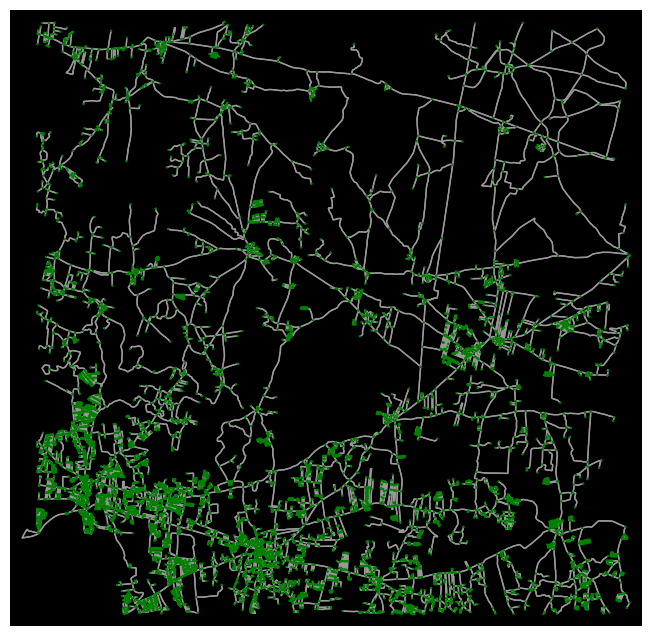

In [69]:

# Download the graph from OpenStreetMap within a distance of 10,000 meters
G = ox.graph_from_point(start, dist=10000, network_type="drive")

# Add edge speeds and travel times to the graph
G = ox.add_edge_speeds(G)  # Adds travel speeds to the graph
G = ox.add_edge_travel_times(G)  # Adds travel time to the graph

# Plot the graph with custom settings
fig, ax = ox.plot_graph(G, bgcolor="black", node_size=3, node_color="green", figsize=(16,8))

In [70]:
# Get the nearest node to the starting point
start_node = ox.distance.nearest_nodes(G, start[1], start[0])

# Apply nearest_nodes to each row in the DataFrame to find the nearest node for the y, x coordinates
df["node"] = df[["Delivery_location_latitude", "Delivery_location_longitude"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)

# Drop duplicate nodes, keeping the first occurrence
df = df.drop_duplicates("node", keep="first")

# Display the first 5 rows of the DataFrame
df.head(5)


C:\Users\ab31s\AppData\Local\Temp\ipykernel_14000\3762776899.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["node"] = df[["Delivery_location_latitude", "Delivery_location_longitude"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\ab31s\AppData\Local\Temp\ipykernel_14000\3762776899.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["node"] = df[["Delivery_location_latitude", "Delivery_location_longitude"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\ab31s\AppData\Local\Temp\ipykernel_14000\3762776899.py:5: FutureWarning: Series.__getitem__ treatin

,id,City,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,node
0,0,PUNE,18.562450,73.916619,18.652450,74.006619,8003345447
1,1,PUNE,18.592718,73.773572,18.702718,73.883572,9679163711
2,2,PUNE,18.563934,73.915367,18.643935,73.995367,8020594248
3,3,PUNE,18.514210,73.838429,18.624210,73.948429,7984537237
5,5,PUNE,18.551440,73.804855,18.621440,73.874855,3651158619


In [71]:

# Function to calculate shortest path length
def f(a, b):
    try:
        # Calculate shortest path length using Dijkstra's algorithm
        d = nx.shortest_path_length(G, source=a, target=b, method='dijkstra', weight='travel_time')
    except nx.NetworkXNoPath:
        # Return NaN if no path is found
        d = np.nan
    except Exception as e:
        # Print the error message for debugging
        print(f"Error calculating shortest path between {a} and {b}: {e}")
        # Return NaN if an unexpected error occurs
        d = np.nan
    return d

# Create distance matrix by applying the function f to each pair of nodes
distance_matrix = np.asarray([[f(a, b) for b in df["node"].tolist()] for a in df["node"].tolist()])

# Convert the distance matrix to a pandas DataFrame for better readability
distance_matrix = pd.DataFrame(distance_matrix, columns=df["node"].values, index=df["node"].values)

# Display the first few rows of the distance matrix
distance_matrix.head()

,8003345447,9679163711,8020594248,7984537237,3651158619,7987179770,2999934914,2999934812,7979341873,4700622963,...,9662937125,8005412943,7990870173,8005395981,11365514800,8011573396,676043294,7452989347,9679177979,11365530460
8003345447,0.0,2049.3,135.3,1146.5,1438.4,1630.0,1532.0,1472.9,1278.5,NaN,...,1199.2,479.7,797.0,1264.4,1197.2,1502.7,1468.5,1444.9,1976.2,1150.3
9679163711,2049.3,0.0,2009.0,2234.6,2734.8,2703.3,2845.4,2786.3,2366.6,NaN,...,2287.3,2353.4,2670.7,2560.8,2894.3,2576.0,2781.9,2865.1,490.9,2847.4
8020594248,135.3,2009.0,0.0,1106.2,1318.5,1589.7,1412.1,1353.0,1238.2,NaN,...,1158.9,359.8,677.1,1144.5,1077.3,1462.4,1348.6,1325.0,1935.9,1030.4
7984537237,1146.5,2234.6,1106.2,0.0,651.7,843.2,762.3,703.2,507.1,NaN,...,134.3,1290.8,980.0,477.7,811.2,715.9,698.8,782.0,2161.5,764.3
3651158619,1438.4,2734.8,1318.5,651.7,0.0,1065.7,505.4,446.3,1007.3,NaN,...,637.2,1136.7,825.9,223.2,632.1,938.4,441.9,589.3,2661.7,585.2


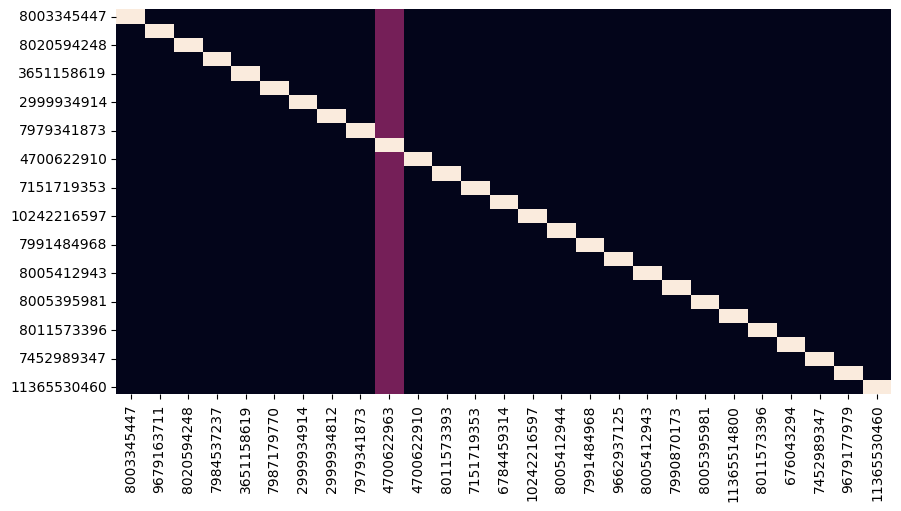

In [72]:
heatmap = distance_matrix.copy()
for col in heatmap.columns:
    heatmap[col]=heatmap[col].apply(lambda x:
        0.3 if pd.isnull(x) else
        (0.7 if np.isinf(x) else
         (0 if x!=0 else 1)))
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heatmap, vmin=0, vmax=1, cbar=False, ax=ax)
plt.show()

In [73]:
# Assuming distance_matrix is your DataFrame
distance_matrix = distance_matrix.dropna()  # Remove rows with NaN
distance_matrix = distance_matrix.astype(int)  # Convert remaining values to integers

In [74]:
drivers = 1
lst_nodes = df["node"].tolist()
print("start:", start_node, "total locations to visit", len(lst_nodes)-1,"drivers", drivers)

start: 8003345447 total locations to visit 26 drivers 1


In [75]:
manager = pywrapcp.RoutingIndexManager(len(lst_nodes), drivers, lst_nodes.index(start_node))
model=pywrapcp.RoutingModel(manager)

In [76]:
# Function to get the distance between two nodes using their indices in the distance matrix
def get_distance(from_index, to_index):
    # Access the distance from the precomputed distance matrix
    return distance_matrix.iloc[from_index, to_index]

# Register the distance function as the transit callback
distance = model.RegisterTransitCallback(get_distance)

# Set the transit cost (distance) evaluator for all vehicles
model.SetArcCostEvaluatorOfAllVehicles(distance)

# Define routing search parameters
parameters = pywrapcp.DefaultRoutingSearchParameters()

# Set the first solution strategy to find a solution with the least cost arc
parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)



In [77]:
# Solve the problem with parameters
solution = model.SolveWithParameters(parameters)

# Start from the first node (typically the depot or starting point)
index = model.Start(0)
print('Route for Driver:')

# Initialize variables for route and distance
route_idx = []
route_distance = 0

# Loop through the solution until reaching the end node
while not model.IsEnd(index):
    route_idx.append(manager.IndexToNode(index))
    previous_index = index
    
    # Move to the next index in the solution
    index = solution.Value(model.NextVar(index))
    
    # Calculate the distance, either using your custom function or OR-Tools' built-in method
    try:
        route_distance += get_distance(previous_index, index)  # Custom distance function
    except:
        route_distance += model.GetArcCostForVehicle(previous_index, index, 0)  # Use OR-Tools distance if custom fails

# Print the final route and its total distance
print(route_idx)
print(f'Total distance: {round(route_distance / 100, 2)} km')
print(f'Nodes visited: {len(route_idx)}')


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000242E4091CD0>>
Traceback (most recent call last):
  File "d:\AI project\aienv\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ab31s\Anaconda3\Lib\threading.py", line 1541, in enumerate
    with _active_limbo_lock:
SystemError: <built-in method __enter__ of _thread.RLock object at 0x00000242E01AD600> returned a result with an exception set
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000242E4091CD0>>
Traceback (most recent call last):
  File "d:\AI project\aienv\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for th

Route for Driver:
[0, 9, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8, 7, 6, 5, 4, 3, 2, 1]
Total distance: 0.0 km
Nodes visited: 27


In [78]:
print("Route for driver (nodes):")
lst_route=[lst_nodes[i] for i in route_idx]
print(lst_route)

Route for driver (nodes):
[8003345447, 4700622963, 11365530460, 9679177979, 7452989347, 676043294, 8011573396, 11365514800, 8005395981, 7990870173, 8005412943, 9662937125, 7991484968, 8005412944, 10242216597, 6784459314, 7151719353, 8011573393, 4700622910, 7979341873, 2999934812, 2999934914, 7987179770, 3651158619, 7984537237, 8020594248, 9679163711]


In [79]:
def get_path_between_nodes(lst_route):
    lst_paths = []
    for i in range(len(lst_route) - 1):  # Loop till second-to-last element
        try:
            a, b = lst_route[i], lst_route[i + 1]  # Get consecutive nodes
        except IndexError:
            break  # End the loop if indices are out of range
        
        try:
            # Find the shortest path between node 'a' and 'b'
            path = nx.shortest_path(G, source=a, target=b, method='dijkstra', weight='travel_time')
            if len(path) > 1:  # Ensure the path has more than one node
                lst_paths.append(path)
        except nx.NetworkXNoPath:
            continue  # Skip if no path exists between the nodes

    return lst_paths

# Assuming lst_route and G are already defined
lst_paths = get_path_between_nodes(lst_route)

# Assuming 'map' is a pre-initialized Folium map object (using ox.plot_route_folium or any Folium map)
for path in lst_paths:
    ox.plot_route_folium(G, route=path, route_map=map, color="blue", weight=1)  # Plot each path on the map

# Return or display the map
map


C:\Users\ab31s\AppData\Local\Temp\ipykernel_14000\2301747001.py:24: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_route_folium(G, route=path, route_map=map, color="blue", weight=1)  # Plot each path on the map
C:\Users\ab31s\AppData\Local\Temp\ipykernel_14000\2301747001.py:24: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstratio

In [86]:
def df_animation_multiple_paths(G, lst_paths, parallel=True):
    dft = pd.DataFrame()  # Initialize an empty DataFrame

    for path in lst_paths:
        lst_start, lst_end = [], []  # Corrected typo from `start_end` to `lst_end`
        start_x, start_y = [], []
        end_x, end_y = [], []
        lst_length, lst_time = [], []

        # Loop through consecutive node pairs (a, b) in the path
        for a, b in zip(path[:-1], path[1:]):
            lst_start.append(a)
            lst_end.append(b)

            # Get edge attributes: length and travel_time
            try:
                edge_data = G.edges[(a, b, 0)]
                lst_length.append(round(edge_data['length']))
                lst_time.append(round(edge_data['travel_time']))
            except KeyError:
                lst_length.append(None)
                lst_time.append(None)

            # Get node coordinates for 'a' and 'b'
            try:
                start_x.append(G.nodes[a]['x'])
                start_y.append(G.nodes[a]['y'])
                end_x.append(G.nodes[b]['x'])
                end_y.append(G.nodes[b]['y'])
            except KeyError:
                start_x.append(None)
                start_y.append(None)
                end_x.append(None)
                end_y.append(None)

        # Create a temporary DataFrame for the current path
        tmp = pd.DataFrame(list(zip(lst_start, lst_end, start_x, start_y, end_x, end_y, lst_length, lst_time)),
                           columns=["start", "end", "start_x", "start_y", "end_x", "end_y", "length", "travel_time"])

        # Concatenate the temporary DataFrame with the main DataFrame
        dft = pd.concat([dft, tmp], ignore_index=(not parallel))

    # Reset index and rename the index column to 'id'
    dft = dft.reset_index().rename(columns={"index": "id"})

    return dft  # Corrected return statement from `df` to `dft`


In [87]:
# Initialize an empty DataFrame
dft = pd.DataFrame()

# Call the function to generate DataFrame from multiple paths
tmp = df_animation_multiple_paths(G, lst_paths, parallel=False)

# Concatenate the existing empty DataFrame `dft` with `tmp`
dft = pd.concat([dft, tmp], axis=0)

# Get the first node from the first path and the last node from the last path
first_node, last_node = lst_paths[0][0], lst_paths[-1][-1]

# Now `dft` contains the combined data, and `first_node` and `last_node` hold the start and end nodes


In [88]:
dft

,id,start,end,start_x,start_y,end_x,end_y,length,travel_time
0,0,4700622963,4700622943,73.939566,18.562584,73.939950,18.562750,44,4
1,1,4700622943,4700622954,73.939950,18.562750,73.940658,18.563076,83,8
2,2,4700622954,8000381681,73.940658,18.563076,73.943111,18.564628,314,30
3,3,8000381681,2836384759,73.943111,18.564628,73.943444,18.564983,53,5
4,4,2836384759,2836384758,73.943444,18.564983,73.943549,18.564929,13,1
...,...,...,...,...,...,...,...,...,...
1915,1915,9679163771,9679163761,73.913441,18.703265,73.913537,18.704098,101,14
1916,1916,9679163761,9679163765,73.913537,18.704098,73.913451,18.704825,88,12
1917,1917,9679163765,9679163758,73.913451,18.704825,73.913698,18.705638,96,13
1918,1918,9679163758,9679163719,73.913698,18.705638,73.913103,18.708234,311,42


In [89]:
def get_path_between_nodes(lst_route):
    lst_paths = []
    visited_nodes = set()  # Keep track of visited nodes
    
    for i in range(len(lst_route) - 1):
        a, b = lst_route[i], lst_route[i + 1]
        
        if a in visited_nodes:
            continue  # Skip if node 'a' was already visited
        
        try:
            # Calculate the shortest path using Dijkstra's algorithm
            path = nx.shortest_path(G, source=a, target=b, method='dijkstra', weight='travel_time')
            
            # Avoid revisiting nodes
            if len(path) > 1 and not any(node in visited_nodes for node in path):
                lst_paths.append(path)
                visited_nodes.update(path)  # Mark all nodes in this path as visited
        except Exception as e:
            print(f"Error calculating path between {a} and {b}: {e}")
            continue
    
    return lst_paths


In [90]:
# Filter data for the first and last nodes
dft_start = dft[dft["start"] == first_node]
dft_end = dft[dft["end"] == last_node]

# Create the scatter plot for the entire route with animation
fig = px.scatter_mapbox(data_frame=dft, 
                        lon="start_x", lat="start_y", 
                        zoom=15, width=900, height=700, 
                        animation_frame='id', 
                        mapbox_style="carto-positron")

# Adjust the size of the main markers
fig.data[0].marker = {"size": 12}

# Speed up the animation by reducing frame duration and transition duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100  # 100ms per frame
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0  # No transition time between frames


# Add scatter plot for all nodes (from another DataFrame df presumably)
fig.add_trace(px.scatter_mapbox(data_frame=df, lon="x", lat="y").data[0])
fig.data[1].marker = {"size": 10, "color": "black"}

# Highlight the starting node in red with a larger size
fig.add_trace(px.scatter_mapbox(data_frame=dft_start, lon="start_x", lat="start_y").data[0])
fig.data[2].marker = {"size": 15, "color": "red"}

# Highlight the ending node in red with a larger size
fig.add_trace(px.scatter_mapbox(data_frame=dft_end, lon="end_x", lat="end_y").data[0])  # Changed to end_x and end_y
fig.data[3].marker = {"size": 15, "color": "red"}

# Add line trace for the route (start to end)
fig.add_trace(px.line_mapbox(data_frame=dft, lon="start_x", lat="start_y").data[0])  # Use start_x, start_y for the full route

# Show the final figure
# Set default renderer to browser
pio.renderers.default = 'browser'

# Show the figure in browser
fig.show()


ValueError: Value of 'lat' is not the name of a column in 'data_frame'. Expected one of ['id', 'City', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'node'] but received: y